In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('crx.csv')

col_names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']

# Assign the list of column names to the DataFrame
df.columns = col_names

# Print the updated DataFrame
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [3]:
# Calculate missing values
missing_values = []
for col in df.columns:
    missing_count = (df[col] == '?').sum()
    missing_percentage = np.round(100 * missing_count / len(df), 2)
    missing_values.append({'Feature': col, 'NumberMissing': missing_count, 'PercentageMissing': missing_percentage})

# Convert the list of dictionaries to a DataFrame
mv_df = pd.DataFrame(missing_values)

# Show dataframe
mv_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Feature,NumberMissing,PercentageMissing
0,Gender,12,1.74
1,Age,12,1.74
2,Debt,0,0.00
3,Married,6,0.87
4,BankCustomer,6,0.87
5,Industry,9,1.31
6,Ethnicity,9,1.31
7,YearsEmployed,0,0.00
8,PriorDefault,0,0.00
9,Employed,0,0.00


In [4]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Print the updated DataFrame
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


## Continuous Values

In [5]:
# List of continuous variables
continuous_variables = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']

# Print the correlation matrix
df[continuous_variables].corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.202367,0.395750,0.185897,0.018536
Debt,0.202367,1.000000,0.298714,0.271003,0.122935
YearsEmployed,0.395750,0.298714,1.000000,0.322247,0.051267
CreditScore,0.185897,0.271003,0.322247,1.000000,0.063616
Income,0.018536,0.122935,0.051267,0.063616,1.000000


In [6]:
# Count NaN values in the 'Age' column
nan_count = df['Age'].isna().sum()
print("Number of NaN values in the 'Age' column:", nan_count)

# Use linear regression to predict missing values
# Step 1: Prepare the data
data = df.dropna(subset=['Age', 'YearsEmployed'])  # Drop rows with NaN values in 'Age' or 'YearsEmployed'
X_train = data[['YearsEmployed']]  # Independent variable
y_train = data['Age']  # Dependent variable

# Step 2: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict missing values
missing_data = df[df['Age'].isna() & df['YearsEmployed'].notna()]  # Rows with missing 'Age' and non-missing 'YearsEmployed'
X_test = missing_data[['YearsEmployed']]
predicted_age = model.predict(X_test)

# Step 4: Fill missing values
df.loc[missing_data.index, 'Age'] = predicted_age

# Check if there are still any NaN values in the 'Age' column
nan_count = df['Age'].isna().sum()
print("Number of NaN values in the 'Age' column after filling:", nan_count)

# Convert 'Age' to appropriate data types
df['Age'] = df['Age'].astype(float)

# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficient for 'YearsEmployed':", model.coef_[0])

Number of NaN values in the 'Age' column: 12
Number of NaN values in the 'Age' column after filling: 0
Intercept: 28.44695288256691
Coefficient for 'YearsEmployed': 1.4123986613048876


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


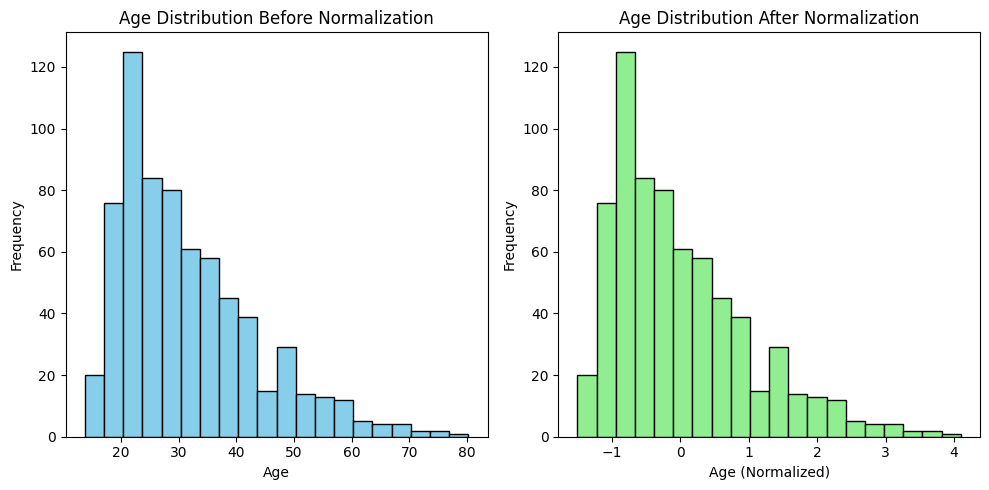

In [7]:
# Normalization
scaler = StandardScaler()

norm_variables = [f'{var}Norm' for var in continuous_variables]
scaler = StandardScaler()
df[norm_variables] = scaler.fit_transform(df[continuous_variables])

# Plot histograms of 'Age' before and after normalization
plt.figure(figsize=(10, 5))

# Plot histogram of 'Age' before normalization
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution Before Normalization')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot histogram of 'Age' after normalization
plt.subplot(1, 2, 2)
plt.hist(df['AgeNorm'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Age Distribution After Normalization')
plt.xlabel('Age (Normalized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 800x600 with 0 Axes>

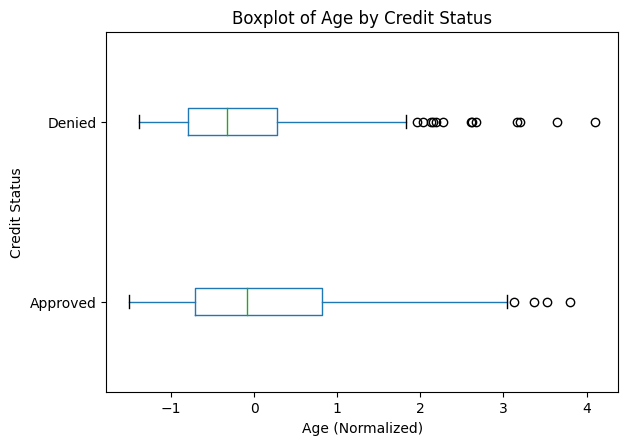

In [8]:
# Plot boxplot comparing credit status by 'AgeNorm'
plt.figure(figsize=(8, 6))
df.boxplot(column='AgeNorm', by='Approved', grid=False, vert=False)
plt.title('Boxplot of Age by Credit Status')
plt.xlabel('Age (Normalized)')
plt.ylabel('Credit Status')
plt.yticks([1, 2], ['Approved', 'Denied'])
plt.suptitle('')  # Remove default title
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


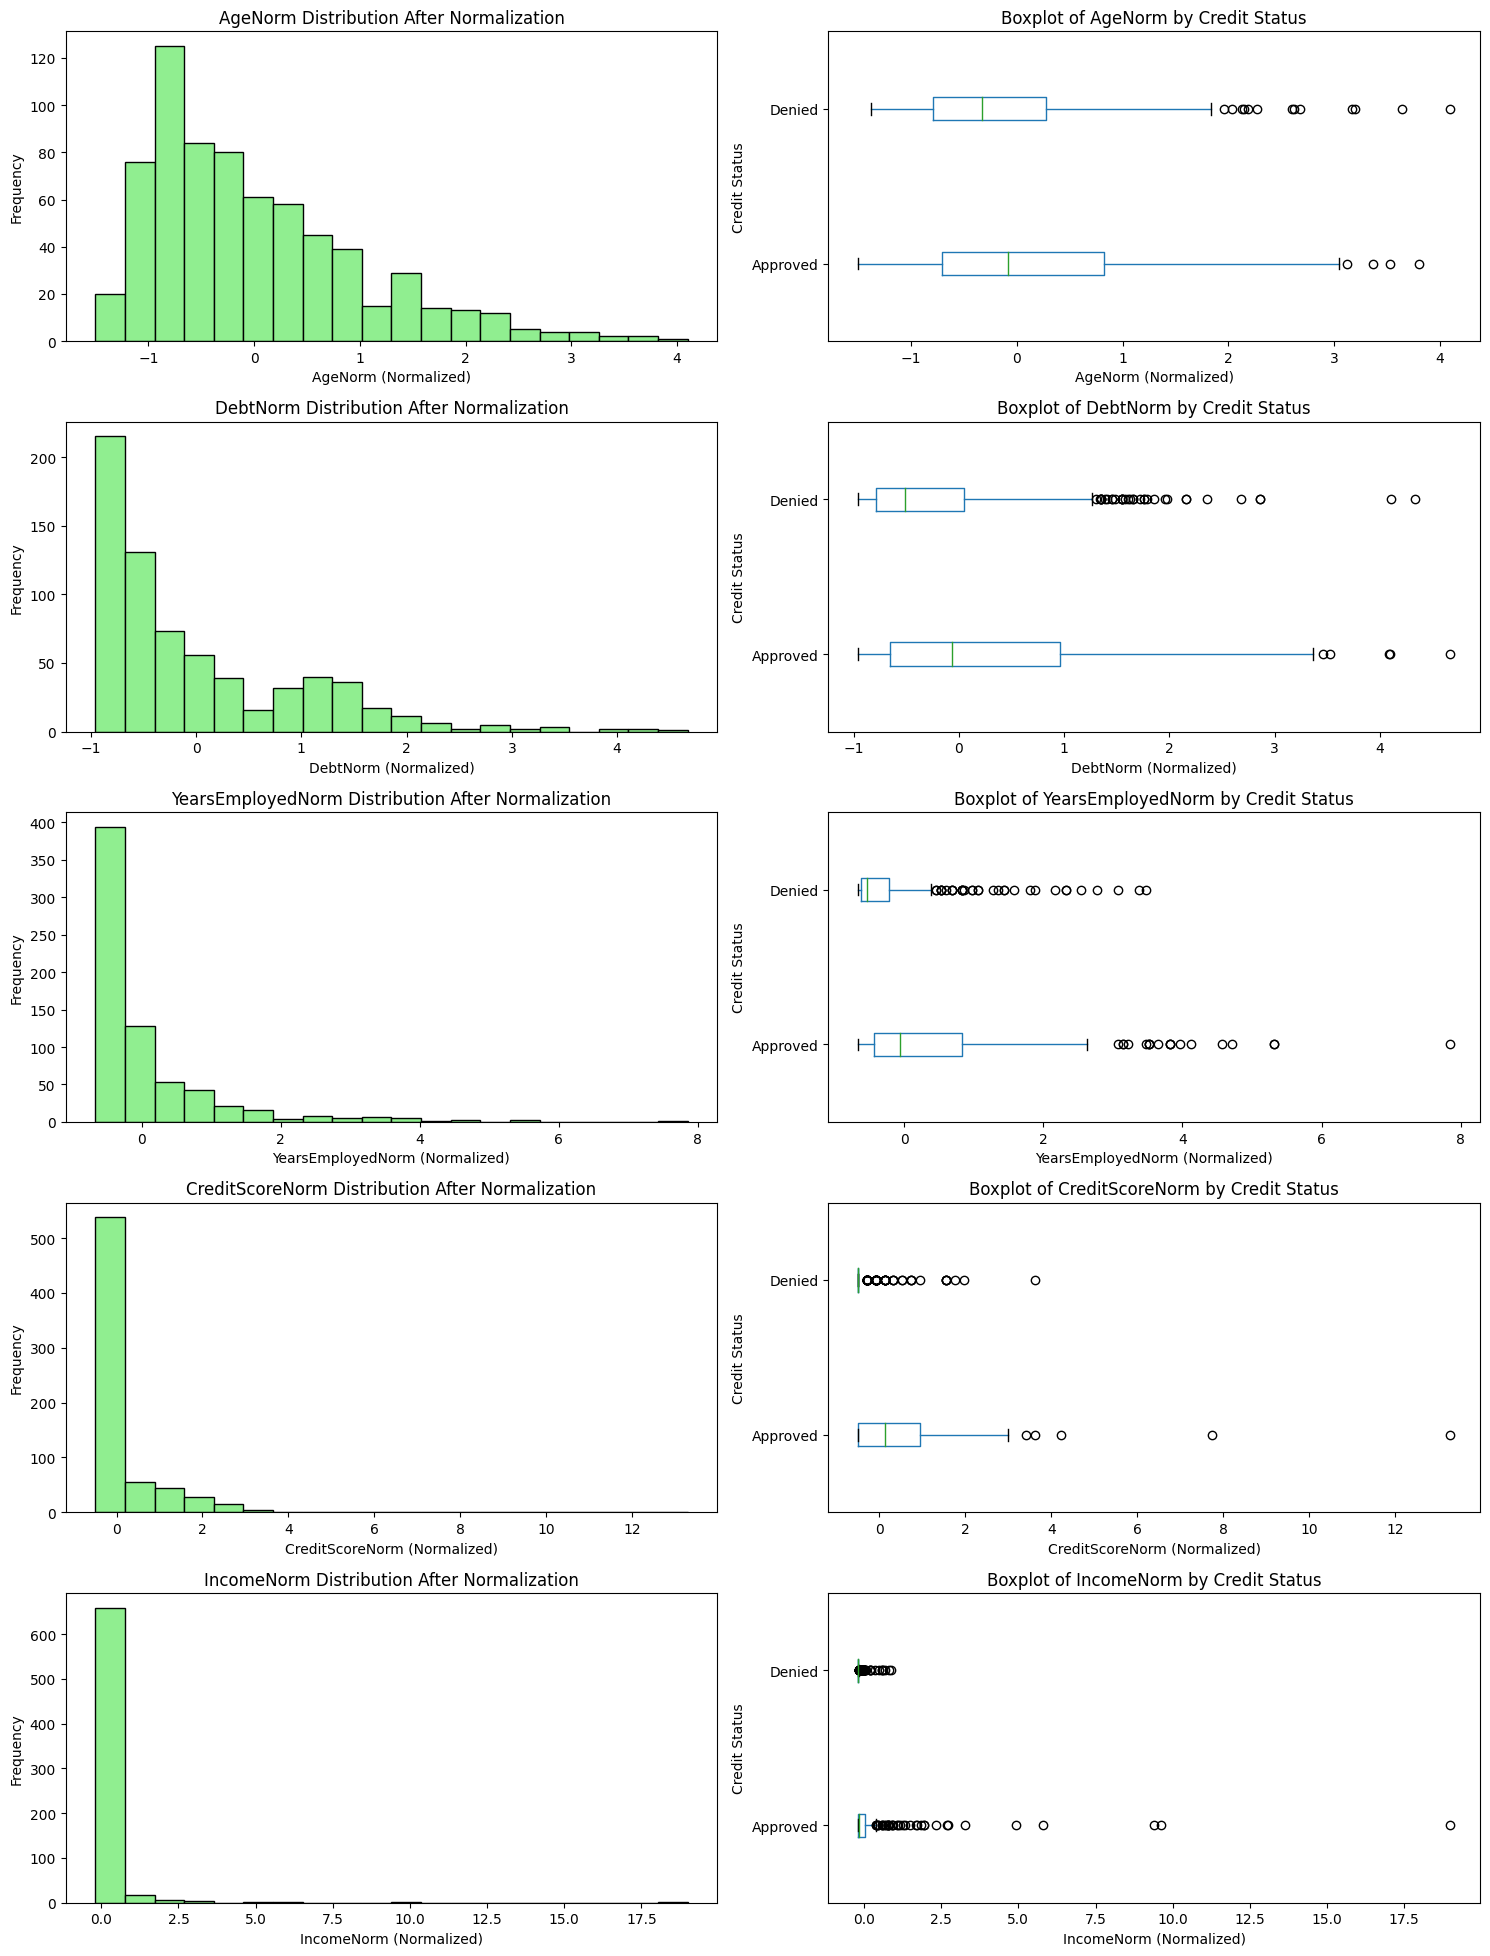

In [9]:
# Create a figure and axes with 5 rows and 2 columns
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Plot histograms of standardized continuous variables on the left and boxplots on the right
for i, attribute in enumerate(norm_variables):
    # Plot histogram of standardized attribute
    axs[i, 0].hist(df[attribute], bins=20, color='lightgreen', edgecolor='black')
    axs[i, 0].set_title(f'{attribute} Distribution After Normalization')
    axs[i, 0].set_xlabel(f'{attribute} (Normalized)')
    axs[i, 0].set_ylabel('Frequency')

    # Plot boxplot of continuous variables by credit status
    df.boxplot(column=attribute, by='Approved', grid=False, vert=False, ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {attribute} by Credit Status')
    axs[i, 1].set_xlabel(f'{attribute} (Normalized)')
    axs[i, 1].set_ylabel('Credit Status')
    axs[i, 1].set_yticklabels(['Approved', 'Denied'])

# Adjust layout
plt.tight_layout()
plt.suptitle('')  # Remove default title

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


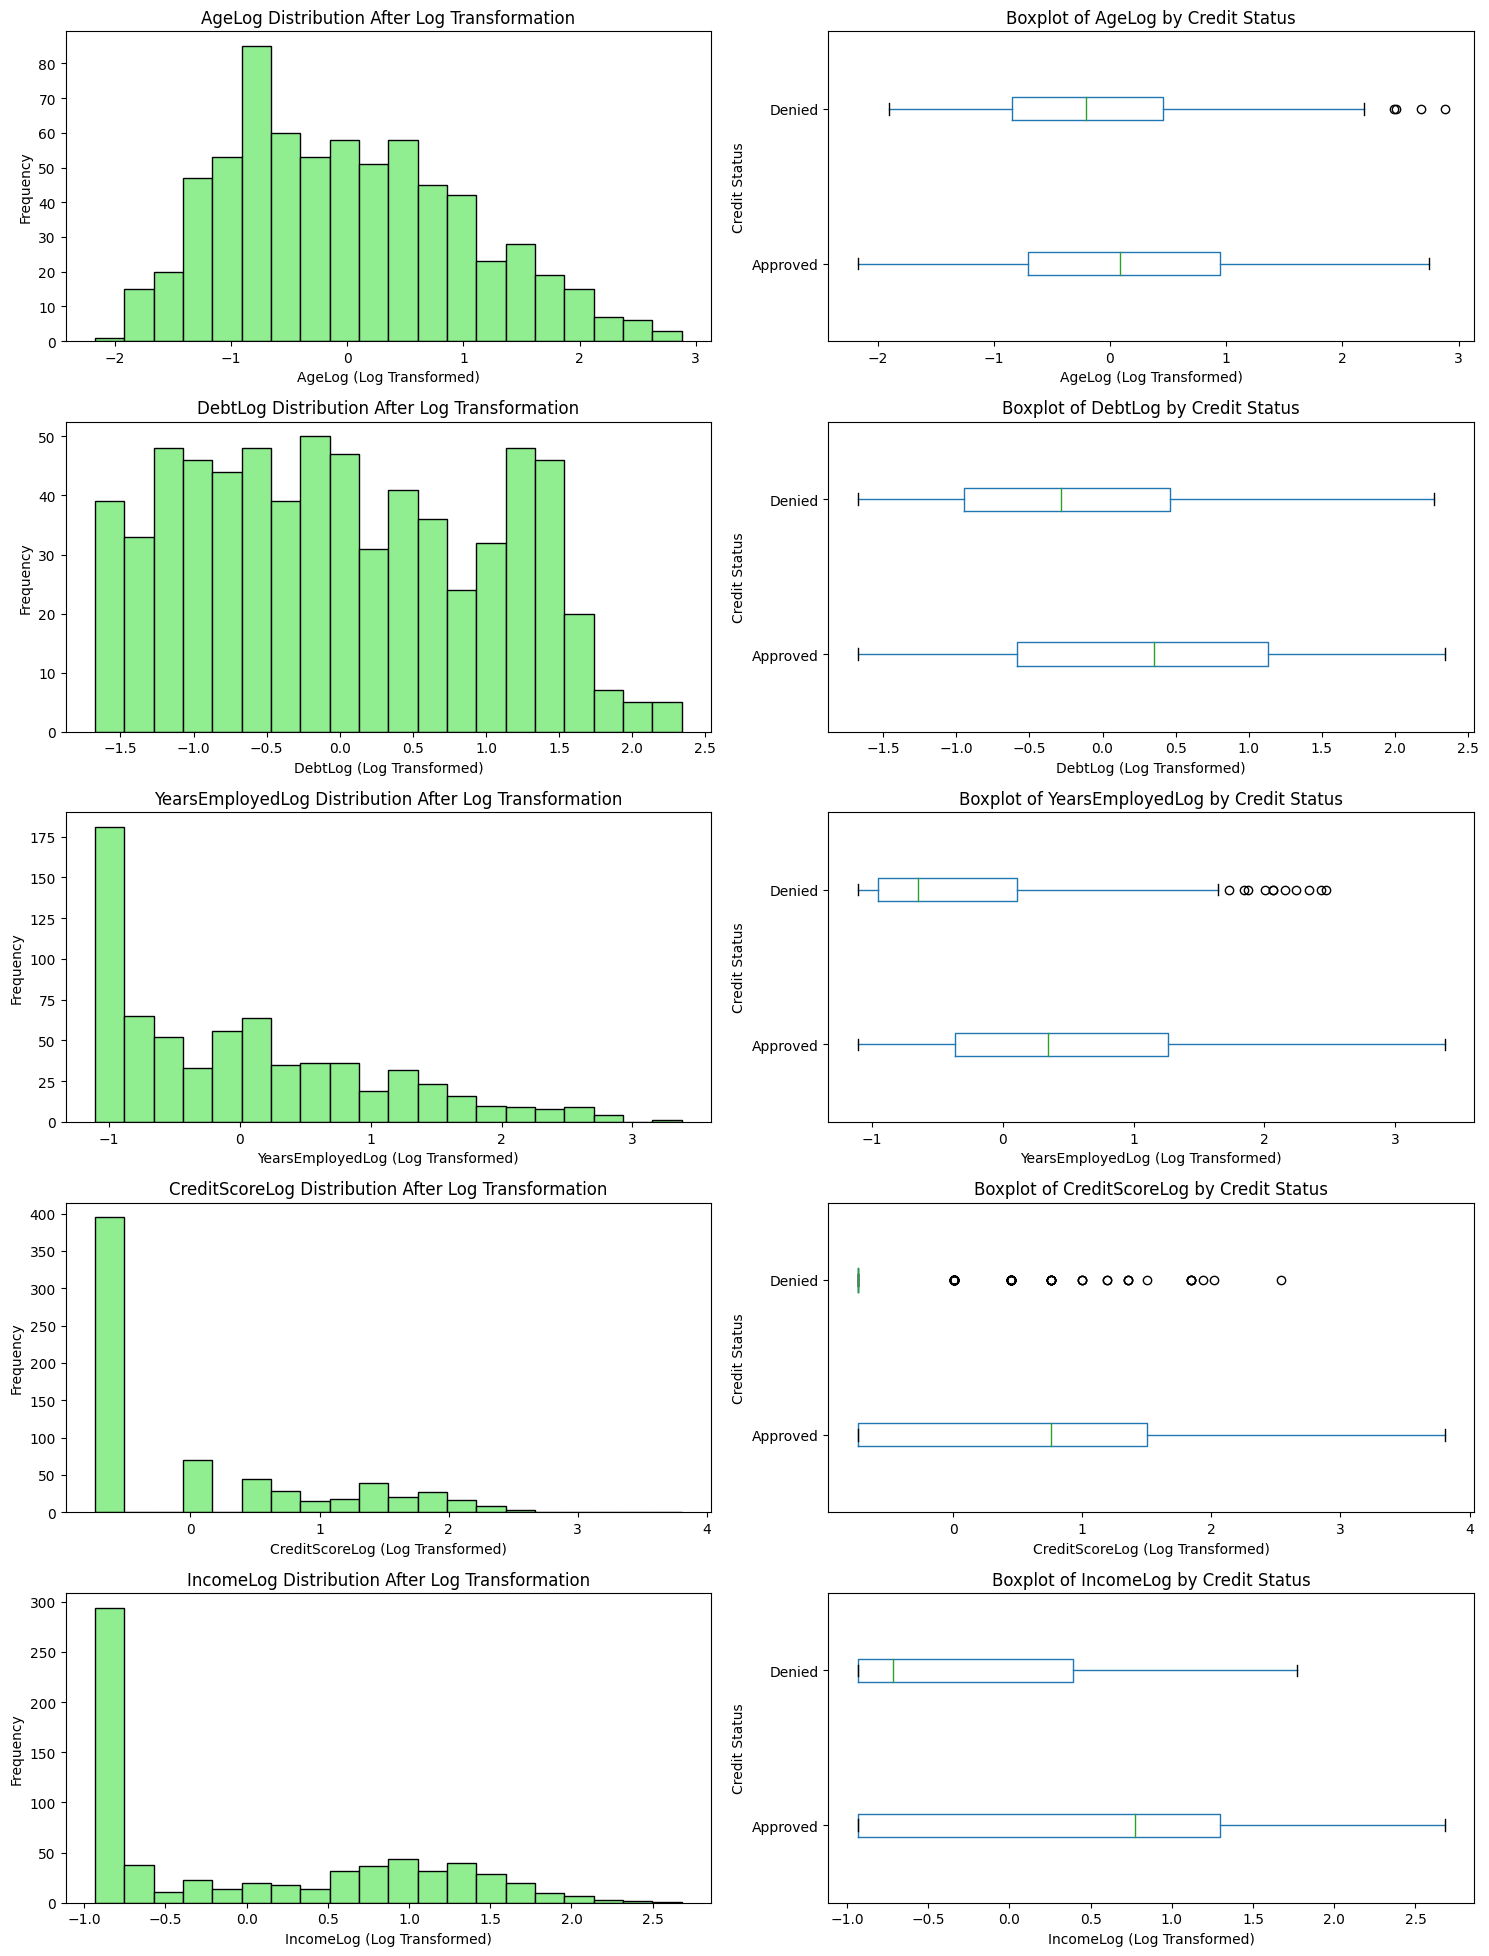

In [10]:
# Take the logarithm of each continuous variable
for var in continuous_variables:
    df[f'{var}Log'] = np.log(df[var] + 1)  # Adding 1 to avoid logarithm of zero or negative values

# Normalize the log-transformed variables
log_transformed_variables = [f'{var}Log' for var in continuous_variables]
scaler = StandardScaler()
df[log_transformed_variables] = scaler.fit_transform(df[log_transformed_variables])

# Create a figure and axes with 5 rows and 2 columns
fig, axs = plt.subplots(5, 2, figsize=(15, 20))

# Plot histograms of log-transformed continuous variables on the left and boxplots on the right
for i, attribute in enumerate(log_transformed_variables):
    # Plot histogram of log-transformed attribute
    axs[i, 0].hist(df[attribute], bins=20, color='lightgreen', edgecolor='black')
    axs[i, 0].set_title(f'{attribute} Distribution After Log Transformation')
    axs[i, 0].set_xlabel(f'{attribute} (Log Transformed)')
    axs[i, 0].set_ylabel('Frequency')

    # Plot boxplot of log-transformed continuous variables by credit status
    df.boxplot(column=attribute, by='Approved', grid=False, vert=False, ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {attribute} by Credit Status')
    axs[i, 1].set_xlabel(f'{attribute} (Log Transformed)')
    axs[i, 1].set_ylabel('Credit Status')
    axs[i, 1].set_yticklabels(['Approved', 'Denied'])

# Adjust layout
plt.tight_layout()
plt.suptitle('')  # Remove default title

# Show the plot
plt.show()


## Categorical Variables

### Gender

In [ ]:
df['Gender'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gender
b    467
a    210
Name: count, dtype: int64

In [ ]:
# Rename entries
df['Gender'].replace('a', 0, inplace=True)
df['Gender'].replace('b', 1, inplace=True)

# Fill missing values with mode and convert to integer type
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


# Convert to integer type
df['Gender']=df['Gender'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Age

In [ ]:
# Identify median age
median_age = df['Age'].median()
print('Median age:', median_age)

# Fill missing values with median
df['Age'].fillna(median_age, inplace=True)

# Convert to float type
df['Age'] = df['Age'].astype(float)

Median age: 28.58


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Married

In [ ]:
df['Married'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Married
u    518
y    163
l      2
Name: count, dtype: int64

In [ ]:
# Fill missing values with 'u'
df['Married'].fillna('u', inplace=True)

# Combine 'divorced' with 'single'
df['Married'].replace('l', 'y', inplace=True)

# Convert to binary feature
df['Married'].replace({'u': 1, 'y': 0}, inplace=True)

# Convert to int type
df['Married'] = df['Married'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### BankCustomer

In [ ]:
df['BankCustomer'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BankCustomer
g     518
p     163
gg      2
Name: count, dtype: int64

In [ ]:
# Fill missing values with mode
df['BankCustomer'].fillna('g', inplace=True)

# Combine gg with g (as there are only 2 entries)
df.loc[df['BankCustomer']=='gg','BankCustomer']='g'

# Convert to binary feature (gg=has bank account, p=does not have bank account)
df.loc[df['BankCustomer']=='g','BankCustomer']=1
df.loc[df['BankCustomer']=='p','BankCustomer']=0

# Convert to int type
df['BankCustomer']=df['BankCustomer'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Industry

In [ ]:
df['Industry'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Industry
c     137
q      78
w      63
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: count, dtype: int64

In [ ]:
# Fill missing values with mode
df['Industry'].fillna('c', inplace=True)

# Rename categories
df['Industry'].replace({'c':'Energy','q':'Materials','w':'Industrials','i':'ConsumerDiscretionary','aa':'ConsumerStaples','ff':'Healthcare','k':'Financials','cc':'InformationTechnology','m':'CommunicationServices','x':'Utilities','d':'Real Estate','e':'Education','j':'Research','r':'Transport'}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Ethnicity

In [ ]:
df['Ethnicity'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ethnicity
v     398
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64

In [ ]:
# Fill missing values with mode
df['Ethnicity'].fillna('v', inplace=True)

# Combine minority groups together
df.loc[df['Ethnicity'].isin(['j','z','dd','n','o']),'Ethnicity']='Other'

# Rename categories
df['Ethnicity'].replace({'v':'White','h':'Black','bb':'Asian','ff':'Latino'}, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### PriorDefault

In [ ]:
# Rename entries
df['PriorDefault'].replace('t', 1, inplace=True)
df['PriorDefault'].replace('f', 0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Employed

In [ ]:
# Rename entries
df['Employed'].replace('t', 1, inplace=True)
df['Employed'].replace('f', 0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### DriversLicense

In [ ]:
# Rename entries
df['DriversLicense'].replace('t', 1, inplace=True)
df['DriversLicense'].replace('f', 0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Citizen

In [ ]:
df['Citizen'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Citizen
g    624
s     57
p      8
Name: count, dtype: int64

In [ ]:
# Rename entries
df['Citizen'].replace('g', 'ByBirth', inplace=True)
df['Citizen'].replace('s', 'ByOtherMeans', inplace=True)
df['Citizen'].replace('p', 'Temporary', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### ZipCode

In [ ]:
df['ZipCode'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ZipCode
00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00393      1
00395      1
00093      1
00204      1
00256      1
Name: count, Length: 169, dtype: int64

In [ ]:
# Fill missing values with mode
df['ZipCode'].fillna('00000', inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Approved

In [ ]:
# Rename entries (1 is approved, 0 is not approved)
df['Approved'].replace('-', 0, inplace=True)
df['Approved'].replace('+', 1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preview result
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,...,AgeNorm,DebtNorm,YearsEmployedNorm,CreditScoreNorm,IncomeNorm,AgeLog,DebtLog,YearsEmployedLog,CreditScoreLog,IncomeLog
0,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,...,2.281963,-0.061435,0.243606,0.739920,-0.088074,1.965790,0.348649,0.742436,1.356858,1.052306
1,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,...,-0.597380,-0.857438,-0.216602,-0.493976,-0.037402,-0.550347,-1.190626,0.106330,-0.739570,1.173339
2,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,...,-0.316777,-0.648387,0.455780,0.534270,-0.194985,-0.187087,-0.563115,0.957010,1.190784,-0.499100
3,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,...,-0.962248,0.172742,-0.153847,-0.493976,-0.195561,-1.101115,0.579068,0.213230,-0.739570,-0.934164
4,1,32.08,4.000,1,1,CommunicationServices,White,2.50,1,0,...,0.041350,-0.153900,0.082234,-0.493976,-0.195561,0.219899,0.243792,0.552273,-0.739570,-0.934164


In [ ]:
# Save DataFrame to CSV file
df.to_csv('clean_data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read data from CSV file
df = pd.read_csv('pulsar_data_train.csv')

# Perform train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save test set to CSV file
train_df.to_csv('train_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
